<a href="https://colab.research.google.com/github/massidi/test_stage/blob/main/stage_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # !pip install opencv-contrib-python
# !pip install easyocr
# !pip install keras-ocr -q
# !pip install img2table -q
# !pip install img2table[easyocr] -q
# !pip install img2table[paddle] -q

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# import pytesseract
import easyocr


import cv2
import matplotlib.pyplot as plt

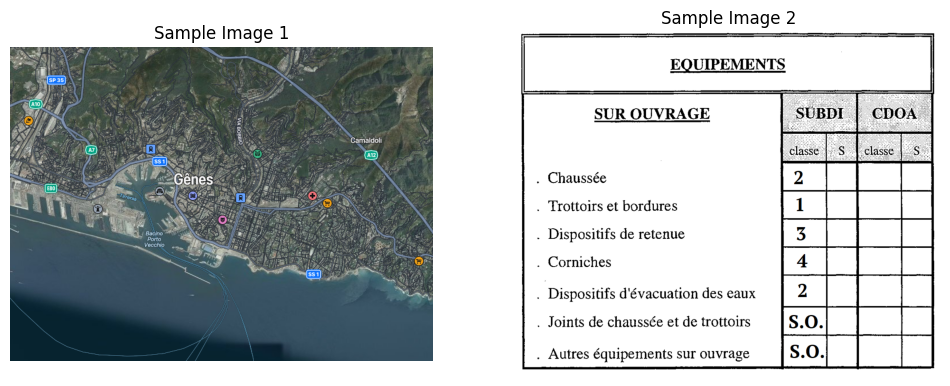

In [4]:
# Read the images using OpenCV
img = cv2.imread('/content/Genova.png')
img2 = cv2.imread('/content/Extrait_IQOA_data.png')

# Convert the images from BGR (OpenCV default) to RGB (matplotlib default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the first image
axes[0].imshow(img_rgb)
axes[0].set_title('Sample Image 1')
axes[0].axis('off')

# Display the second image
axes[1].imshow(img2_rgb)
axes[1].set_title('Sample Image 2')
axes[1].axis('off')

plt.show()


### First Method with pyterract

In [ ]:
# pytesseract.image_to_string(img),pytesseract.image_to_string(img)


(' \n\n \n\x0c', ' \n\n \n\x0c')

In [ ]:
# pytesseract.image_to_string(img),pytesseract.image_to_string(img2)


(' \n\n \n\x0c',
 "EQUIPEMENTS\n\nSUR OUVRAGE\n\n. Chaussée\n. Trottoirs et bordures\n. Dispositifs de retenue\n\n. Corniches\n\n. Dispositifs d'évacuation des eaux\n\n. Joints de chaussée et de trottoirs\n\n. Autres équipements sur ouvrage\n\n \n\x0c")

### Second Method with Easyocr

In [5]:
reader=easyocr.Reader(['fr'],gpu=False)
results=reader.readtext(img)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [6]:
data=pd.DataFrame(results,columns=['Box','text', 'accuracy'])
data


,Box,text,accuracy
0,"[[65, 53], [97, 53], [97, 67], [65, 67]]",6p35,0.574443
1,"[[593, 157], [653, 157], [653, 173], [593, 173]]",Camaldoli,0.999937
2,"[[284, 218], [360, 218], [360, 248], [284, 248]]",Gênes,0.999955
3,"[[234, 320], [269, 320], [269, 334], [234, 334]]",Bacino,0.922897
4,"[[240, 334], [264, 334], [264, 340], [240, 340]]",Pacn,0.007191
5,"[[232, 340], [271, 340], [271, 354], [232, 354]]",Vaccho,0.614047


> #### Convert the output into a json format

In [7]:
json_string = data[['text', 'accuracy']].to_json()
print(json_string)

{"text":{"0":"6p35","1":"Camaldoli","2":"G\u00eanes","3":"Bacino","4":"Pacn","5":"Vaccho"},"accuracy":{"0":0.5744428039,"1":0.9999366194,"2":0.9999552178,"3":0.9228965391,"4":0.007191157,"5":0.6140469536}}


### Third methode with keras-ocr

In [8]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()
result=pipeline.recognize([img])


Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 7s 7s/step


In [10]:
pd.DataFrame(result[0],columns=['text', 'bbox'])

,text,bbox
0,sp,"[[67.0, 55.0], [81.0, 55.0], [81.0, 64.0], [67..."
1,35,"[[82.0, 55.0], [95.0, 55.0], [95.0, 65.0], [82..."
2,a10,"[[36.0, 96.0], [55.0, 96.0], [55.0, 108.0], [3..."
3,,"[[396.33636, 125.11958], [405.94543, 124.87318..."
4,camaldoli,"[[595.0, 159.0], [651.0, 159.0], [651.0, 170.0..."
5,a12,"[[624.0, 186.0], [644.0, 186.0], [644.0, 197.0..."
6,ss,"[[252.0, 197.0], [265.0, 197.0], [265.0, 207.0..."
7,genes,"[[287.24637, 221.60823], [357.56827, 223.95229..."
8,e80,"[[64.0, 244.0], [80.0, 244.0], [80.0, 254.0], ..."
9,tirronia,"[[191.64706, 255.4118], [223.88235, 263.47064]..."


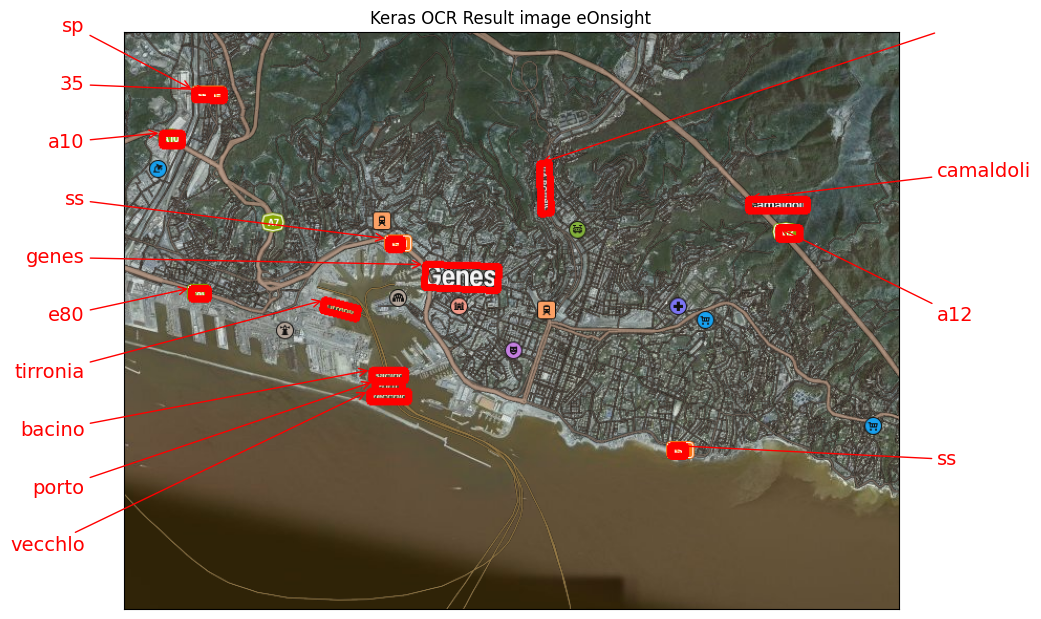

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(image=img, predictions=result[0], ax=ax)
ax.set_title('Keras OCR Result image eOnsight')
plt.show()

[link text](https:// [link text](https://))### Extract text from table by maintaining the table format using img2table
> installation of all the dependence we will using along.

### First methode using EasyOCR

In [12]:
from img2table.document import Image
from img2table.ocr import EasyOCR


img=Image(src="/content/Extrait_IQOA_data.png")
ocr = EasyOCR(lang=["fr"])

# Extract tables with Tesseract and PaddleOCR
tables_easyocr = img.extract_tables(ocr=ocr, borderless_tables=True)


In [13]:
tables_easyocr[0].df

,0,1,2,3,4
0,EQUIPEMENTS,EQUIPEMENTS,EQUIPEMENTS,EQUIPEMENTS,EQUIPEMENTS
1,SUR QUVRAGE\nChaussée\nTrottoirs et bordures\n...,SUBDI,SUBDI,CDOA,CDOA
2,SUR QUVRAGE\nChaussée\nTrottoirs et bordures\n...,classe,None,classe,5
3,SUR QUVRAGE\nChaussée\nTrottoirs et bordures\n...,2,None,None,None
4,SUR QUVRAGE\nChaussée\nTrottoirs et bordures\n...,1,None,None,None
5,SUR QUVRAGE\nChaussée\nTrottoirs et bordures\n...,3,None,None,None
6,SUR QUVRAGE\nChaussée\nTrottoirs et bordures\n...,4,None,None,None
7,SUR QUVRAGE\nChaussée\nTrottoirs et bordures\n...,2,None,None,None
8,SUR QUVRAGE\nChaussée\nTrottoirs et bordures\n...,None,None,None,None
9,SUR QUVRAGE\nChaussée\nTrottoirs et bordures\n...,S.0,None,None,None


### Second methode using PaddleOCR

In [14]:
from img2table.ocr import PaddleOCR
img=Image(src="/content/Extrait_IQOA_data.png")
ocr = PaddleOCR(lang="fr", kw={"use_dilation": True})

# Extract tables with Tesseract and PaddleOCR
tables_padd = img.extract_tables(ocr=ocr, borderless_tables=False)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:12<00:00, 329kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/latin_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer/latin_PP-OCRv3_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:14<00:00, 694kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:08<00:00, 260kiB/s]


In [15]:
tables_padd[0].df

,0,1,2,3,4
0,EQUIPEMENTS,EQUIPEMENTS,EQUIPEMENTS,EQUIPEMENTS,EQUIPEMENTS
1,SUR OUVRAGE\n. Chaussée\nTrottoirs et bordures...,SUBDI,SUBDI,CDOA,CDOA
2,SUR OUVRAGE\n. Chaussée\nTrottoirs et bordures...,classe,None,classe,None
3,SUR OUVRAGE\n. Chaussée\nTrottoirs et bordures...,2,None,None,None
4,SUR OUVRAGE\n. Chaussée\nTrottoirs et bordures...,1,None,None,None
5,SUR OUVRAGE\n. Chaussée\nTrottoirs et bordures...,3,None,None,None
6,SUR OUVRAGE\n. Chaussée\nTrottoirs et bordures...,4,None,None,None
7,SUR OUVRAGE\n. Chaussée\nTrottoirs et bordures...,2,None,None,None
8,SUR OUVRAGE\n. Chaussée\nTrottoirs et bordures...,S.0.,None,None,None
9,SUR OUVRAGE\n. Chaussée\nTrottoirs et bordures...,S.0.,None,None,None


In [16]:
import pandas as pd

df = tables_easyocr[0].df.copy()

# Function to process the first two rows of the first column
def process_first_two_rows(df):
    processed_elements = []
    for i in range(3):
        cell = df.iloc[i, 0]
        if pd.isna(cell):
            processed_elements.append(None)
        else:
            elements = cell.split('\n')
            # Take the first element
            processed_elements.append(elements[0])
    return processed_elements

# Function to process the remaining rows of the first column
def process_remaining_rows(df):
    processed_elements = []
    for i in range(3, len(df.iloc[:, 0])):
        cell = df.iloc[i, 0]
        if pd.isna(cell):
            processed_elements.append(None)
        else:
            elements = cell.split('\n')
            # Remove the first element
            elements = elements[1:]
            if i - 3 < len(elements):
                processed_elements.append(elements[i - 3])
            else:
                processed_elements.append(None)
    return processed_elements

# Process the first column
processed_first_two_rows = process_first_two_rows(df)
processed_remaining_rows = process_remaining_rows(df)
processed_first_column = processed_first_two_rows + processed_remaining_rows

# Create a DataFrame with the processed column and other columns unchanged
processed_df = df.copy()
processed_df.iloc[:, 0] = processed_first_column

display(processed_df)


,0,1,2,3,4
0,EQUIPEMENTS,EQUIPEMENTS,EQUIPEMENTS,EQUIPEMENTS,EQUIPEMENTS
1,SUR QUVRAGE,SUBDI,SUBDI,CDOA,CDOA
2,SUR QUVRAGE,classe,None,classe,5
3,Chaussée,2,None,None,None
4,Trottoirs et bordures,1,None,None,None
5,Dispositifs de retenue,3,None,None,None
6,Corniches,4,None,None,None
7,Dispositifs d'évacuation des eaux,2,None,None,None
8,Joints de chaussée et de trottoirs,None,None,None,None
9,Autres équipements sur ouvrage,S.0,None,None,None


In [17]:
# Set the first ,second and the third rows as the column headers
processed_df.columns = [processed_df.iloc[0].values, processed_df.iloc[1].values,processed_df.iloc[2].values]

# Remove the first two rows
df = processed_df.iloc[2:].reset_index(drop=True)
display(df)

EQUIPEMENTS                            
                          SUR QUVRAGE   SUBDI          CDOA      
                          SUR QUVRAGE  classe   NaN  classe     5
0                         SUR QUVRAGE  classe  None  classe     5
1                            Chaussée       2  None    None  None
2               Trottoirs et bordures       1  None    None  None
3              Dispositifs de retenue       3  None    None  None
4                           Corniches       4  None    None  None
5   Dispositifs d'évacuation des eaux       2  None    None  None
6  Joints de chaussée et de trottoirs    None  None    None  None
7      Autres équipements sur ouvrage     S.0  None    None  None

In [18]:
json_string = df.to_json()
display(json_string)

'{"(\'EQUIPEMENTS\', \'SUR QUVRAGE\', \'SUR QUVRAGE\')":{"0":"SUR QUVRAGE","1":"Chauss\\u00e9e","2":"Trottoirs et bordures","3":"Dispositifs de retenue","4":"Corniches","5":"Dispositifs d\'\\u00e9vacuation des eaux","6":"Joints de chauss\\u00e9e et de trottoirs","7":"Autres \\u00e9quipements sur ouvrage"},"(\'EQUIPEMENTS\', \'SUBDI\', \'classe\')":{"0":"classe","1":"2","2":"1","3":"3","4":"4","5":"2","6":null,"7":"S.0"},"(\'EQUIPEMENTS\', \'SUBDI\', nan)":{"0":null,"1":null,"2":null,"3":null,"4":null,"5":null,"6":null,"7":null},"(\'EQUIPEMENTS\', \'CDOA\', \'classe\')":{"0":"classe","1":null,"2":null,"3":null,"4":null,"5":null,"6":null,"7":null},"(\'EQUIPEMENTS\', \'CDOA\', \'5\')":{"0":"5","1":null,"2":null,"3":null,"4":null,"5":null,"6":null,"7":null}}'

In [19]:
import json

# Provided JSON string

# Convert JSON string to Python dictionary
associative_object = json.loads(json_string)

# Display the Python associative object
print(associative_object)

{"('EQUIPEMENTS', 'SUR QUVRAGE', 'SUR QUVRAGE')": {'0': 'SUR QUVRAGE', '1': 'Chaussée', '2': 'Trottoirs et bordures', '3': 'Dispositifs de retenue', '4': 'Corniches', '5': "Dispositifs d'évacuation des eaux", '6': 'Joints de chaussée et de trottoirs', '7': 'Autres équipements sur ouvrage'}, "('EQUIPEMENTS', 'SUBDI', 'classe')": {'0': 'classe', '1': '2', '2': '1', '3': '3', '4': '4', '5': '2', '6': None, '7': 'S.0'}, "('EQUIPEMENTS', 'SUBDI', nan)": {'0': None, '1': None, '2': None, '3': None, '4': None, '5': None, '6': None, '7': None}, "('EQUIPEMENTS', 'CDOA', 'classe')": {'0': 'classe', '1': None, '2': None, '3': None, '4': None, '5': None, '6': None, '7': None}, "('EQUIPEMENTS', 'CDOA', '5')": {'0': '5', '1': None, '2': None, '3': None, '4': None, '5': None, '6': None, '7': None}}


In [20]:
!pip freeze > requirements.txt
